<a href="https://colab.research.google.com/github/sush2004/Python/blob/main/Chemble_use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests

In [ ]:
import requests
from bs4 import BeautifulSoup as BS
import urllib.request
url = "https://www.ebi.ac.uk/chembl/g/#browse/compounds/filter/_metadata.compound_records.src_id%3A52"
response = requests.get(url)
soup = BS(response.content, "html.parser")
images = soup.find_all("svg")
number = 0
for  image in images:



In [ ]:
from PIL import Image
import requests
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

A= "https://www.ebi.ac.uk/chembl/api/data/image/"
name = input("Enter chem name")
url = A + name + ".svg"
print(url)
open(url)

In [ ]:
!pip install matplotlib

In [ ]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
molecule = new_client.molecule
res = molecule.search('viagra')
res

In [ ]:
!pip install chembl-webresource-client

data = {'Month': ['January','February','March','April','May','June','July','August','September','October','November','December'],
        'Days in Month': [31,28,31,30,31,30,31,31,30,31,30,31]}

df = pd.DataFrame(data, columns = ['Month', 'Days in Month'])

contain_values = df[df['Month'].str.contains('')]
print (contain_values)

In [ ]:
pi

0     CCCc1nn(C)c2
1                 
2                 
Name: molecule_structures, dtype: object


In [17]:
!pip install chembl-webresource-client
!pip install pandas 
!pip install cairosvg

In [3]:
from chembl_webresource_client.new_client import new_client
similarity = new_client.similarity
res = similarity.filter(smiles="CO[C@@H](CCC#C\C=C/CCCC(C)CCCCC=C)C(=O)[O-]", similarity=85)
res

[{'atc_classifications': [], 'availability_type': -1, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': None, 'chirality': -1, 'cross_references': [], 'dosed_ingredient': False, 'first_approval': None, 'first_in_class': -1, 'helm_notation': None, 'indication_class': None, 'inorganic_flag': -1, 'max_phase': 0, 'molecule_chembl_id': 'CHEMBL477889', 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL477889', 'parent_chembl_id': 'CHEMBL477888'}, 'molecule_properties': {'alogp': '4.98', 'aromatic_rings': 0, 'cx_logd': '2.88', 'cx_logp': '6.12', 'cx_most_apka': '3.84', 'cx_most_bpka': None, 'full_molformula': 'C20H31NaO3', 'full_mwt': '342.46', 'hba': 2, 'hba_lipinski': 3, 'hbd': 1, 'hbd_lipinski': 1, 'heavy_atoms': 23, 'molecular_species': 'ACID', 'mw_freebase': '320.47', 'mw_monoisotopic': '320.2351', 'num_lipinski_ro5_violations': 0, 'num_ro5_violations': 0, 'psa': '46.53', 'qed_weighted': '0.30', 'ro3_pass': 'N', 'rtb': 13}, 'molecule_structures': {'canonical_smiles': 'C=C

**Get all approved drugs:**

In [23]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4)
res=pd.DataFrame(approved_drugs)
res.head(2)

KeyboardInterrupt: ignored

**Get approved drugs for disease**





In [25]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
drug_indication = new_client.drug_indication
molecules = new_client.molecule
lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA")
lung_cancer_mols = molecules.filter(molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind])
res=pd.DataFrame(lung_cancer_mols)
res.head(2)

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_synonyms,molecule_type,natural_product,oral,parenteral,polymer_flag,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,"[L04AA10, S01XA23]",1.0,None,1,9168.0,1,"[{'xref_id': 'sirolimus', 'xref_name': 'siroli...",True,1999.0,0,None,Immunosuppressant,0,4,CHEMBL413,"{'molecule_chembl_id': 'CHEMBL413', 'parent_ch...","{'alogp': '6.18', 'aromatic_rings': 0, 'cx_log...",{'canonical_smiles': 'CO[C@H]1C[C@@H]2CC[C@@H]...,"[{'molecule_synonym': 'AY-22989', 'syn_type': ...",Small molecule,1,True,False,False,SIROLIMUS,0,MOL,True,False,-imus,"immunosuppressives: immunosuppressant, rapamyc...",-imus (-rolimus),1993.0,None,None,False,None,NaN
1,[L01DB03],1.0,None,1,47898.0,1,"[{'xref_id': 'epirubicin%20hydrochloride', 'xr...",False,1999.0,0,None,Antineoplastic,0,4,CHEMBL417,"{'molecule_chembl_id': 'CHEMBL417', 'parent_ch...","{'alogp': '0.00', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'COc1cccc2c1C(=O)c1c(O)c3...,"[{'molecule_synonym': 'Ellence', 'syn_type': '...",Small molecule,1,False,True,False,EPIRUBICIN,0,MOL,True,False,-rubicin,antineoplastic antibiotics (daunorubicin type),-rubicin,1984.0,None,None,False,None,NaN


In [87]:
from chembl_webresource_client.new_client import *
import pandas as pd
import cairosvg
import os

molecule = new_client.molecule
res = molecule.search('Paracetamole')
res = pd.DataFrame(res)

res =res[['molecule_chembl_id','pref_name','molecule_structures']]

res= res.astype({'molecule_structures': str})
#res.info() 
res['molecule_structures'] = res['molecule_structures'].astype('string')
res['molecule_structures'][0]
res['molecule_structures'] = res['molecule_structures'].apply(lambda x: (x.split(":")[1]).split(",")[0])
res
for x in res.values:
  url = "https://www.ebi.ac.uk/chembl/api/data/image/" + x[0] + ".svg"
  mol_str = x[0] + ".png"
  print(url)


https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL112.svg
https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL3544802.svg
https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL1647.svg


In [86]:
molecule = new_client.molecule
res = molecule.search('Paracetamole')
res = pd.DataFrame(res)

res =res[['molecule_chembl_id','pref_name','molecule_structures']]

res= res.astype({'molecule_structures': str})
#res.info() 
res['molecule_structures'] = res['molecule_structures'].astype('string')
res['molecule_structures'][0]
res['molecule_structures'] = res['molecule_structures'].apply(lambda x: (x.split(":")[1]).split(",")[0])
res

,molecule_chembl_id,pref_name,molecule_structures
0,CHEMBL112,ACETAMINOPHEN,'CC(=O)Nc1ccc(O)cc1'
1,CHEMBL3544802,None,'CC(=O)Nc1ccc(OS(=O)(=O)O)cc1'
2,CHEMBL1647,ACETAMINOPHEN GLUCURONIDE,'CC(=O)Nc1ccc(O[C@@H]2O[C@H](C(=O)O)[C@@H](O)...


In [ ]:
import pandas as pd
molecule = new_client.molecule
res = molecule.search('Paracetamole')
res = pd.DataFrame(res)
res =res[['molecule_chembl_id''pref_name','molecule_structures']]
res= res.astype({'molecule_structures': str})
res['molecule_structures'] = res['molecule_structures'].astype('string')
res['molecule_structures']

res['molecule_structures'] = res['molecule_structures'].apply(lambda x: (x.split(":")[1]).split(",")[0])

for x in res.values:
  print('Id : {} , Name : {} , Structure : {}'.format(x[0], x[1], x[2]))

In [ ]:
def func1(row):
    return pd.Series((row['molecule_structures'].split(':')[1]).split[','][0])

In [ ]:
molecule = new_client.molecule
res = molecule.search('Paracetamol')
res = pd.DataFrame(res)
res =res[['pref_name','molecule_structures']]
res= res.astype({'molecule_structures': str})
#res.info() 
res['molecule_structures'] = res['molecule_structures'].astype('string')
res=res['molecule_structures'][0]


x = txt.split(": ")

print(x)

["{'canonical_smiles'", "'CC(=O)Nc1ccc(O)cc1', 'molfile'", "'\\n     RDKit          2D\\n\\n 11 11  0  0  0  0  0  0  0  0999 V2000\\n    1.5548   -3.6021    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    2.5951   -3.0039    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    3.6331   -3.6060    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\\n    2.5973   -1.5031    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\\n    1.2990   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    0.0000    1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n   -1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n   -2.3383    1.3500    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\\n   -1.2990   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n    0.0000   -1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\\n  1  2  1  0\\n  2  3  2  0\\n  2  4  1  0\\n  4  5  1  0\\n  5  6  2  0\\

In [ ]:
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
res = molecule.search('ibuprofen')
res[0]

In [ ]:
#importing files
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF, renderPM
from pathlib import Path
import requests
from io import BytesIO
import matplotlib.pyplot as plt

#Address
url="https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL1584351.svg"
response = requests.get(url)
image = Image.open(response)
image
#passing object 
drawing = svg2rlg(BytesIO(response.content))
drawing
renderPDF.drawToFile(drawing, "file.pdf")
renderPM.drawToFile(drawing, "file.png", fmt="PNG")



In [ ]:
import cairosvg
from PIL import Image
import requests
from io import BytesIO

url = "https://www.ebi.ac.uk/chembl/api/data/image/" + "CHEMBL1584351" + ".svg"
cairosvg.svg2png(url=url, write_to="CHEMBL1584351.jpg")
aux_im = Image.open('CHEMBL1584351.jpg')
aux_im


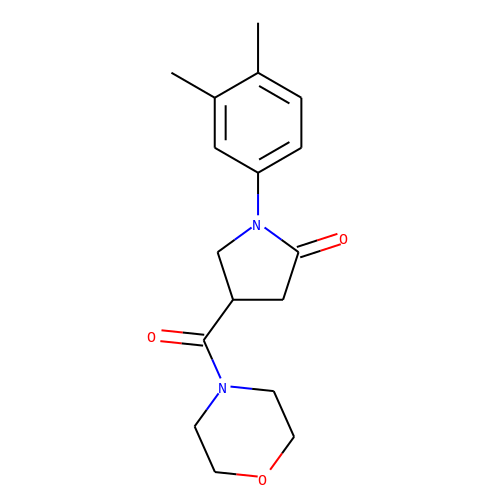

In [3]:
import cairosvg
from PIL import Image
#import requests
#from io import BytesIO

a=cairosvg.svg2png(url="https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL1584358.svg", write_to="CHEMBL1584358.jpg")
aux_im = Image.open('CHEMBL1584358.jpg')
aux_im
#https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL1584358.svg

In [ ]:
import pyvips

image = pyvips.Image.new_from_file("https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL1584351.svg", dpi=300)
image.write_to_file("https://www.ebi.ac.uk/chembl/api/data/image/CHEMBL1584351.png")

cairosvg.svg2pdf(url='image.svg', write_to='image.pdf')

In [ ]:
!pip install pyvips

In [2]:
!pip install cairosvg

     |████████████████████████████████| 51kB 4.6MB/s 
     |████████████████████████████████| 71kB 6.6MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp36-none-any.whl size=89552 sha256=237a1d49b1444d73e08b51c19f682c603a35a1b056bd92ac200377bac098b22a
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [ ]:
import io
import requests
from PIL import Image
r = requests.get('https://www.bimbaylola.com/media/catalog/product/1/8/182BAC104_T2200_P_T_XX_1.jpg', stream=True)
aux_im = Image.open(io.BytesIO(r.content))
aux_im

In [ ]:
response = requests.get("https://i.imgur.com/ExdKOOz.png")
image_bytes = io.BytesIO(response.content)

img = PIL.Image.open(image_bytes)
img.show()

In [65]:
!pip install svglib
!pip install scikit-image